<a href="https://colab.research.google.com/github/reagenhuskey/cs290/blob/main/gmm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [216]:
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import StandardScaler
from scipy.stats import multivariate_normal

In [217]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

In [218]:
df['species'] = iris.target

In [219]:
target_names = {
    0:'setosa',
    1:'versicolor',
    2:'virginica'
}

df['species_name'] = df['species'].map(target_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,species_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [220]:
df.drop(columns=['species_name'], inplace=True)

# SciKit Learn

In [221]:
from sklearn.mixture import GaussianMixture

In [222]:
gm = GaussianMixture(n_components=3) # creates gm, which calls the GMM object. N is the amount of clusters
gm.fit(df) # Trains the model using the iris df. Fit estimates the parameters (means, covariances, weights)
            # based on the data. Adjusts the model to best represent the patterns in the dataset

GaussianMixture(n_components=3)

In [223]:
gm.weights_ # estimated proportions of each feature

array([0.33333333, 0.33333333, 0.33333333])

In [224]:
gm.means_ # the average for each cluster where each row represents the mean values for each feature

array([[5.936, 2.77 , 4.26 , 1.326, 1.   ],
       [5.006, 3.428, 1.462, 0.246, 0.   ],
       [6.588, 2.974, 5.552, 2.026, 2.   ]])

In [225]:
gm.covariances_ # indicates the relationship between two variables.

array([[[2.61105e-01, 8.34800e-02, 1.79240e-01, 5.46640e-02,
         0.00000e+00],
        [8.34800e-02, 9.65010e-02, 8.10000e-02, 4.03800e-02,
         0.00000e+00],
        [1.79240e-01, 8.10000e-02, 2.16401e-01, 7.16400e-02,
         0.00000e+00],
        [5.46640e-02, 4.03800e-02, 7.16400e-02, 3.83250e-02,
         0.00000e+00],
        [0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
         1.00000e-06]],

       [[1.21765e-01, 9.72320e-02, 1.60280e-02, 1.01240e-02,
         0.00000e+00],
        [9.72320e-02, 1.40817e-01, 1.14640e-02, 9.11200e-03,
         0.00000e+00],
        [1.60280e-02, 1.14640e-02, 2.95570e-02, 5.94800e-03,
         0.00000e+00],
        [1.01240e-02, 9.11200e-03, 5.94800e-03, 1.08850e-02,
         0.00000e+00],
        [0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
         1.00000e-06]],

       [[3.96257e-01, 9.18880e-02, 2.97224e-01, 4.81120e-02,
         0.00000e+00],
        [9.18880e-02, 1.01925e-01, 6.99520e-02, 4.66760e-02,
         0.

In [226]:
gm.converged_

True

In [227]:
gm.n_iter_

3

In [228]:
gm.predict(df)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [229]:
gm.predict_proba(df).round(3)

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1

In [230]:
X_new, y_new = gm.sample(6)
X_new

array([[ 5.45859089e+00,  4.04959707e+00,  1.80086082e+00,
         2.36227526e-01,  8.84333236e-04],
       [ 5.14665846e+00,  3.92636308e+00,  1.53884330e+00,
         3.21374774e-01,  2.63155835e-04],
       [ 5.05710704e+00,  3.19460817e+00,  1.54194543e+00,
         7.79406585e-02, -2.48575061e-04],
       [ 5.39384632e+00,  3.15109870e+00,  4.49268611e+00,
         2.15092679e+00,  2.00032400e+00],
       [ 5.89918181e+00,  2.91614459e+00,  4.71623043e+00,
         1.94465639e+00,  2.00008812e+00],
       [ 8.06205425e+00,  3.31402769e+00,  7.23816916e+00,
         2.43863896e+00,  1.99971681e+00]])

In [231]:
y_new

array([1, 1, 1, 2, 2, 2])

# KMeans

In [232]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

In [233]:
def random_centroid(df, k):
  np.random.seed(42)
  columns_to_drop = ['species', 'species_name']
  existing_columns = df.columns
  columns_to_drop = [col for col in columns_to_drop if col in existing_columns]
  sample = df.sample(k).drop(columns=columns_to_drop)
  return sample.reset_index(level = 0, drop=True)

In [234]:
def draw_clusters(df, centroids, iter, x_col='petal length (cm)', y_col='petal width (cm)', s='species_name'):
  plt.figure(figsize=(5, 3))
  #plot each cluster
  sns.scatterplot(x = x_col, y = y_col, data = df, hue=s, palette = sns.color_palette("magma"))
  #plot centroids
  sns.scatterplot(x = x_col, y = y_col, data = centroids, c = "black", marker="X", s = 200, label="centroids")

  plt.title(f"Iteration {iter}")
  plt.legend()
  plt.show()

In [235]:
def find_clusters(df, centroids, s, draw=True, feature_columns=None):
  centroids = pd.DataFrame(centroids, columns=feature_columns)
  og_centroids = pd.DataFrame()
  iter = 0
  #run while new centroids are different from the old ones
  while not og_centroids.equals(centroids):
    #update og centroids
    og_centroids = centroids.copy()
    if feature_columns is None:
      feature_columns = df.select_dtypes(include=['number']).columns[:2].tolist()
    for i in df.index: # each point in df
      distances = [] # distances from current point to each centroid
      #for each centroid/row
      for _, row in centroids.iterrows():
        #calculate the euclidean distance from current point to the current row/centroid.
        distances.append(euclidean_distance(df.loc[i, feature_columns], row[feature_columns]))
      best_cluster = np.argmin(distances)
      df.loc[i, 'best_cluster'] = best_cluster #update centroids
    if draw:
      draw_clusters(df, centroids, iter, feature_columns[0], feature_columns[1], s)
    iter += 1
    #recalculate centroids
    centroids = df.groupby('best_cluster')[feature_columns].mean()
  return df

In [236]:
def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

In [237]:
from matplotlib.colors import LogNorm # used for mapping in log scale

def plot_gaussian_mixture(clusterer, X, colx, coly, resolution=1000, show_ylabels=True):
    clustered_data = find_clusters(X.copy(), clusterer.means_, 'best_cluster', False, [colx, coly])
    centroids = clustered_data.groupby('best_cluster')[[colx, coly]].mean().values

    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = -clusterer.score_samples(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z,
                 norm=LogNorm(vmin=1.0, vmax=30.0),
                 levels=np.logspace(0, 2, 12))
    plt.contour(xx, yy, Z,
                norm=LogNorm(vmin=1.0, vmax=30.0),
                levels=np.logspace(0, 2, 12),
                linewidths=1, colors='k')

    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z,
                linewidths=2, colors='r', linestyles='dashed')

    plt.plot(X[colx], X[coly], 'k.', markersize=2)

    plot_centroids(clusterer.means_, clusterer.weights_)
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=100, c='blue', label='KMeans Centroids')

    plt.xlabel(colx)
    if show_ylabels:
        plt.ylabel(coly, rotation=0)
    else:
        plt.tick_params(labelleft=False)

# iris

In [238]:
simpdf = df[['sepal length (cm)', 'sepal width (cm)']]

In [239]:
gm_simp = GaussianMixture(n_components=3, n_init=10)
gm_simp.fit(simpdf)

GaussianMixture(n_components=3, n_init=10)

<ipython-input-237-e1b886704802>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
<ipython-input-237-e1b886704802>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  np.linspace(mins[1], maxs[1], resolution))
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.wa

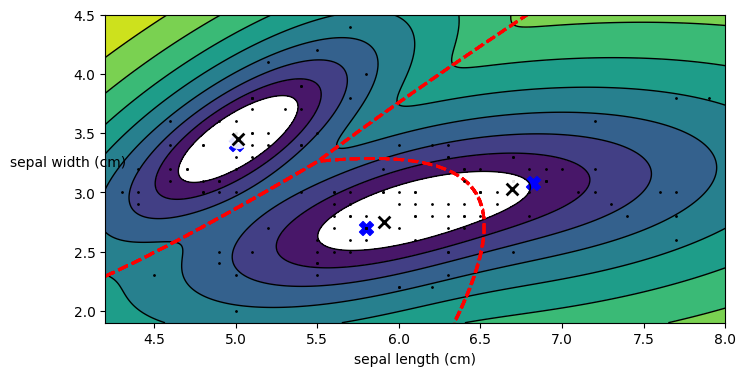

In [240]:
plt.figure(figsize=(8, 4))
plot_gaussian_mixture(gm_simp, simpdf, 'sepal length (cm)', 'sepal width (cm)')
plt.show()

# penguins

In [241]:
penguins = pd.read_csv("https://github.com/mbrudd/csci290/raw/refs/heads/main/data/penguins.csv")
penguins = penguins.drop(columns=['island', 'sex'])
penguins = penguins.dropna()

In [242]:
penguins['species_num'] = penguins['species'].map({
    'Adelie': 0,
    'Gentoo': 1,
    'Chinstrap': 2
})

penguins.drop(columns=['species'], inplace=True)

In [243]:
penguins.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year,species_num
0,39.1,18.7,181.0,3750.0,2007,0
1,39.5,17.4,186.0,3800.0,2007,0
2,40.3,18.0,195.0,3250.0,2007,0
4,36.7,19.3,193.0,3450.0,2007,0
5,39.3,20.6,190.0,3650.0,2007,0


In [244]:
penguinsdf = penguins[['bill_length_mm', 'bill_depth_mm']]

In [245]:
penguinsgm = GaussianMixture(n_components=3) # creates gm, which calls the GMM object. N is the amount of clusters
penguinsgm.fit(penguinsdf)

GaussianMixture(n_components=3)

<ipython-input-237-e1b886704802>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
<ipython-input-237-e1b886704802>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  np.linspace(mins[1], maxs[1], resolution))
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.wa

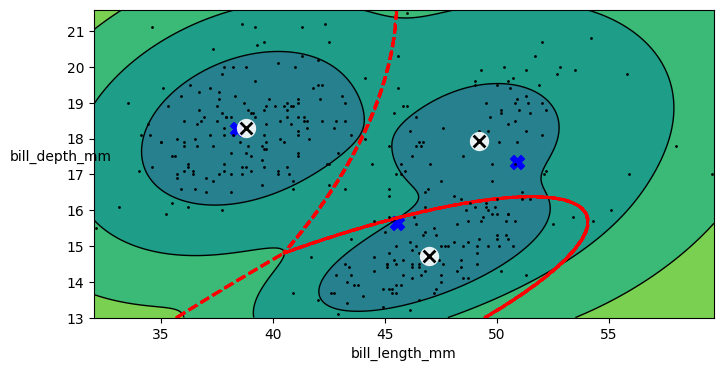

In [246]:
plt.figure(figsize=(8, 4))
plot_gaussian_mixture(penguinsgm, penguinsdf, 'bill_length_mm', 'bill_depth_mm')
plt.show()

# Accuracy

In [247]:
def calculate_accuracy(df, clustered_df, target):
    accuracy = 0
    for i in df.index:
        if df.loc[i,target] == clustered_df.loc[i, 'best_cluster']:
            accuracy += 1
    return accuracy / len(df)

In [248]:
calculate_accuracy(df, find_clusters(df, random_centroid(df, 3), 'best_cluster', draw=False), 'species')

0.22666666666666666

In [249]:
calculate_accuracy(penguins, find_clusters(penguins, random_centroid(penguins, 3), 'best_cluster', draw=False), 'species_num')

0.07602339181286549

In [252]:
calculate_accuracy(simpdf, find_clusters(simpdf, random_centroid(simpdf, 3), 'best_cluster', draw=False), df['species'])

KeyError: "None of [Index([0, 0, 0, 0, 0, 0, 0, 0, 0, 0,\n       ...\n       2, 2, 2, 2, 2, 2, 2, 2, 2, 2],\n      dtype='int64', length=150)] are in the [index]"

In [ ]:
calculate_accuracy(penguinsgm, find_clusters(penguinsgm, random_centroid(penguinsgm, 3), 'best_cluster', draw=False), 'species_num')